
# Tutorial: Visualizing Model Performance: Box Plots for Comparison

Selamat datang di subchapter 4.3! Di bagian sebelumnya, kita telah menghasilkan tabel peringkat performa model. Angka-angka tersebut sangat informatif, tetapi otak kita seringkali lebih cepat menangkap pola melalui gambar.

**Tujuan:** Di notebook ini, kita akan belajar cara memvisualisasikan hasil dari *cross-validation* menggunakan **Box Plots**. Visualisasi ini akan memberi kita pemahaman yang lebih dalam tidak hanya tentang performa **rata-rata** setiap model, tetapi juga tentang **stabilitas** dan **konsistensi** performa mereka.




---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan mengapa *box plot* adalah alat yang sangat baik untuk membandingkan hasil *cross-validation*.
* Menyiapkan data hasil `cross_val_score` ke dalam format yang sesuai untuk di-plot.
* Membuat dan mengkustomisasi *box plot* menggunakan Seaborn untuk membandingkan beberapa model.
* Menginterpretasikan *box plot* untuk memilih model yang tidak hanya berkinerja tinggi, tetapi juga stabil.





---
### 2. Mengapa Box Plot?

`cross_val_score` memberi kita **sekumpulan skor** (satu skor untuk setiap *fold*). Sebuah *box plot* sangat sempurna untuk meringkas distribusi dari sekumpulan skor ini.

Saat membandingkan model, *box plot* memungkinkan kita untuk melihat:
* **Median (garis di tengah kotak):** Performa tipikal model. Median yang lebih tinggi lebih baik.
* **Rentang Interkuartil (panjang kotak):** Seberapa stabil performa model. Kotak yang lebih pendek dan rapat menunjukkan model yang lebih stabil dan konsisten.
* **Outliers (titik di luar "kumis"):** Apakah ada *fold* di mana model berperforma sangat buruk secara anomali.



---
### 3. Setup: Menggunakan Kembali Hasil dari Subchapter Sebelumnya

Kita akan memulai dengan data dan model yang sama, tetapi kali ini kita akan menyimpan **semua skor mentah** dari `cross_val_score`, bukan hanya rata-rata dan standar deviasinya.



In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Model-model yang akan kita bandingkan
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Muat data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan model-model kita lagi
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Ridge': make_pipeline(StandardScaler(), Ridge()),
    'Lasso': make_pipeline(StandardScaler(), Lasso()),
    'Decision Tree': make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42)),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42)),
    'Gradient Boosting': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=42))
}



---
### 4. Langkah 1: Kumpulkan Semua Skor Mentah

Kita akan menjalankan *loop* yang sama, tetapi kali ini kita akan menyimpan *list* dari skor R² untuk setiap model.



In [12]:
raw_scores = {}

print("Memulai evaluasi model...")

for name, model in models.items():
	# folding 5 cross validation
	scores = cross_val_score(model,X_train,y_train, cv=10, scoring='r2',n_jobs=-1)

	# simpan hasil
	raw_scores[name] = scores
	print(f"Evaluasi untuk {name} selesai.")



Memulai evaluasi model...
Evaluasi untuk Linear Regression selesai.
Evaluasi untuk Ridge selesai.
Evaluasi untuk Lasso selesai.
Evaluasi untuk Decision Tree selesai.
Evaluasi untuk Random Forest selesai.
Evaluasi untuk Gradient Boosting selesai.


In [9]:
print(raw_score['Linear Regression'])

[0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]



---
### 5. Langkah 2: Buat Box Plot

Sekarang kita memiliki *dictionary* yang berisi nama model sebagai kunci dan array skor sebagai nilai. Ini adalah format yang sempurna untuk di-plot.



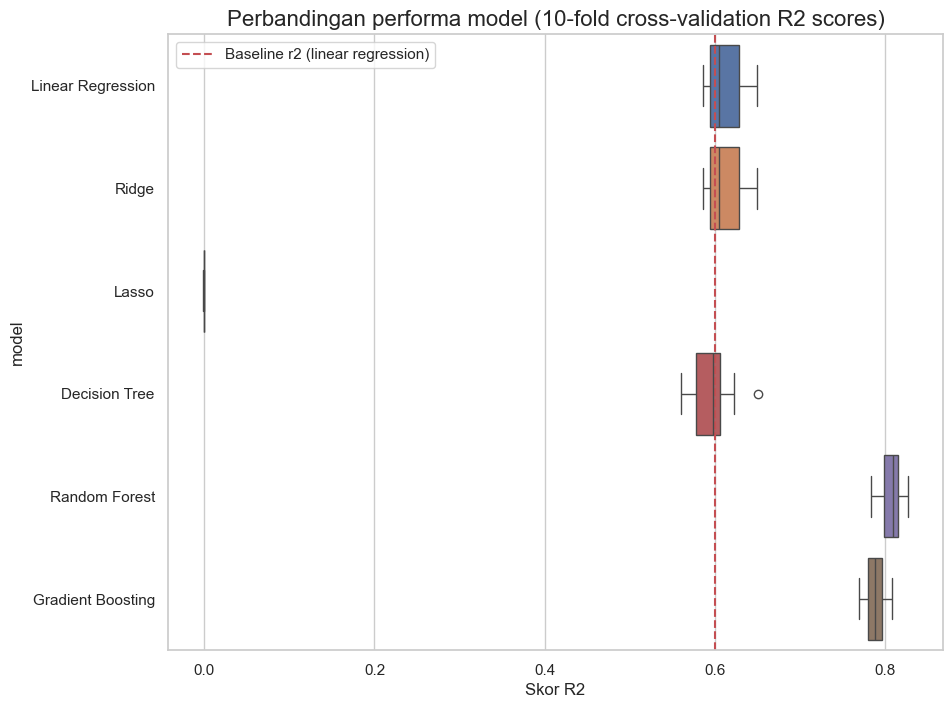

In [13]:
scores_df = pd.DataFrame(raw_scores)

# atur style plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))

ax = sns.boxplot(data=scores_df,orient='h')

plt.title("Perbandingan performa model (10-fold cross-validation R2 scores)",fontsize=16)
plt.xlabel("Skor R2",fontsize=12)
plt.ylabel("model",fontsize=12)
plt.axvline(x=0.6, color='r',linestyle='--', label='Baseline r2 (linear regression)')

plt.legend()

plt.show()


### 6. Langkah 3: Interpretasi Visual

Visualisasi ini memberikan wawasan yang jauh lebih kaya daripada tabel angka:

1.  **Performa Median:** Kita bisa dengan mudah melihat bahwa median (garis di dalam kotak) untuk **Gradient Boosting** dan **Random Forest** secara signifikan lebih tinggi daripada model-model lainnya. Ini mengkonfirmasi bahwa mereka adalah kandidat teratas.

2.  **Stabilitas:** Perhatikan panjang kotak (IQR). **Random Forest** dan **Gradient Boosting** memiliki kotak yang relatif rapat, yang menunjukkan performa mereka konsisten di berbagai subset data. Sebaliknya, **Decision Tree** memiliki kotak yang lebih panjang, menandakan performanya kurang stabil.

3.  **Distribusi:** Kita bisa melihat keseluruhan sebaran skor. Meskipun median Gradient Boosting mungkin sedikit lebih tinggi, distribusi skor Random Forest terlihat sangat padat di bagian atas, menjadikannya pilihan yang sangat andal.

4.  **Perbandingan dengan Baseline:** Garis putus-putus merah (baseline dari Regresi Linear) dengan jelas menunjukkan seberapa besar peningkatan performa yang diberikan oleh model-model *ensemble*. Model apa pun yang kotaknya berada jauh di kanan garis ini adalah peningkatan yang signifikan.




---
### 7. Kesimpulan Tutorial

Menggunakan *box plot* untuk memvisualisasikan hasil *cross-validation* adalah praktik standar dalam pemilihan model. Ini memungkinkan kita untuk membuat keputusan yang lebih terinformasi dengan mempertimbangkan tidak hanya performa rata-rata, tetapi juga stabilitas dan konsistensi model.

Berdasarkan visualisasi ini, kita dapat dengan percaya diri memilih **Random Forest** dan **Gradient Boosting** sebagai kandidat final kita. Di subchapter selanjutnya, kita akan membawa mereka ke "babak final": *hyperparameter tuning*.


****